In [69]:
import numpy as np 
import pandas as pd
import os
import pickle

In [70]:
TARGET_FOLDER = 'logs/vehs_10'

# load states and actions
with open(f'{TARGET_FOLDER}/states.pkl', 'rb') as f:
    states = pickle.load(f)
with open(f'{TARGET_FOLDER}/actions.pkl', 'rb') as f:
    actions = pickle.load(f)


In [71]:
# get the percentage of policy action that are 1
non_greedy_actions = np.sum(actions)
print(f'Percentage of non-greedy actions: {non_greedy_actions/len(actions)}')
print(f'Percentage of greedy actions: {1 - non_greedy_actions/len(actions)}')

Percentage of non-greedy actions: 0.0
Percentage of greedy actions: 1.0


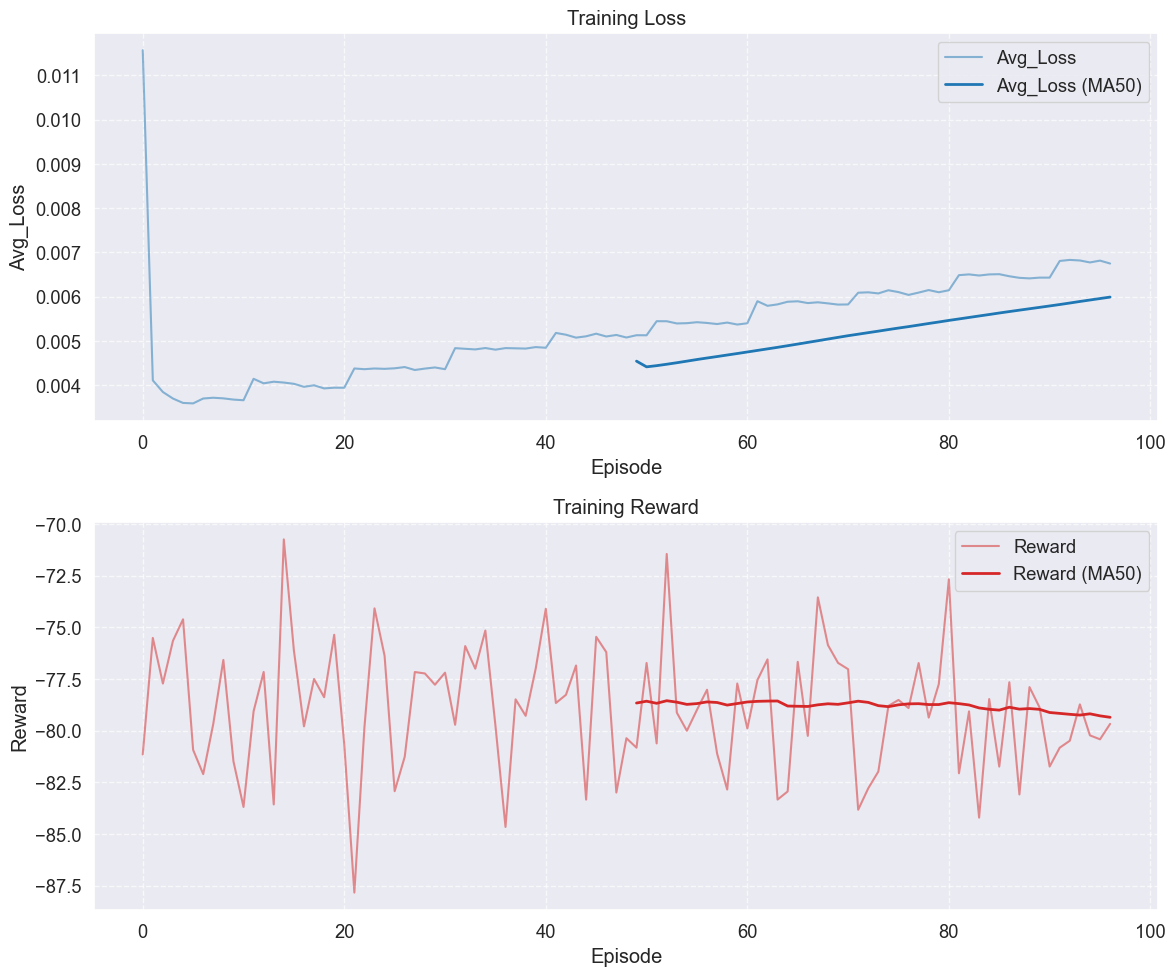

<Figure size 640x480 with 0 Axes>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# 读取CSV文件
df = pd.read_csv('/Users/xwan0069/Desktop/Projects/Circular_Network/logs/loss_log.csv')

# 创建平滑曲线
window_size = 50  # 平滑窗口大小
df_smooth = df.copy()
df_smooth['Avg_Loss'] = df['Avg_Loss'].rolling(window=window_size).mean()
df_smooth['Reward'] = df['Reward'].rolling(window=window_size).mean()

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 第一个子图：Avg_Loss
ax1.plot(df['Episode'], df['Avg_Loss'], color='tab:blue', alpha=0.5, label='Avg_Loss')
ax1.plot(df_smooth['Episode'], df_smooth['Avg_Loss'], color='tab:blue', linewidth=2, label=f'Avg_Loss (MA{window_size})')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Avg_Loss')
ax1.set_title('Training Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 第二个子图：Reward
ax2.plot(df['Episode'], df['Reward'], color='tab:red', alpha=0.5, label='Reward')
ax2.plot(df_smooth['Episode'], df_smooth['Reward'], color='tab:red', linewidth=2, label=f'Reward (MA{window_size})')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Reward')
ax2.set_title('Training Reward')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 保存图形
plt.savefig('/Users/xwan0069/Desktop/Projects/Circular_Network/figures/loss_reward_plots.png', dpi=300, bbox_inches='tight')